# Exploratory data analysis

## Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Reading the given data set

In [3]:
student_data = pd.read_csv('StudentsPerformance.csv')

In [3]:
student_data.head() # shows first five rows of dataset.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data analysis 

Data analysis includes cleaning of data ,studying the type of the data , observing the relations between the features and obtaining insights from it. The following process includes the same.

In [4]:
student_data.shape # shows number od rows and columns of dataset.

(1000, 8)

The student_data dataset has 1000 rows (number of students) and 8 columns(features)

In [5]:
student_data.columns # List of all the features.

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

#### Checking the datatype of all the features (categorical or numerical) . According to the datatype, we can apply related functions.

In [6]:
student_data.dtypes 

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### Checking for the Null values if any. If we have null values , we need to fill them with appropriate values later.

In [7]:
student_data.isnull().sum() # gives the sum of null values in each column.

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Thus, we have no null values in the dataset and hence the job is easy.

### Overview information

In [8]:
student_data.describe() # To know the distribution of the data.(applicable only to numerical values.)

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From above information, we can assume that students on average are getting better results in reading. Math has least score.75% of students got more than 75 marks in all the tests. This is an important function, in this case it describes the overall performance of all the students in all the tests.

#### Checking the number of unique values in each column

In [9]:
student_data.nunique() # To know the number of unique values in each column.

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Frequency of values in categorical data.

In [10]:
student_data['parental level of education'].value_counts() # The final sum must be equal to 1000 (no null)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
student_data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

More than half of the students are getting standard lunch

In [12]:
pd.get_dummies(student_data.lunch).sum() # we can even use this function to get the same.

free/reduced    355
standard        645
dtype: int64

In [13]:
student_data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

 More students belong to group C .

In [14]:
student_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Females(518) are more in number than males(482)

In [15]:
student_data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Less than half of the total number of students completed the test courses.

### Relations between categorical columns

In [16]:
pd.crosstab(student_data['lunch'],student_data['test preparation course'])

test preparation course,completed,none
lunch,,
free/reduced,131,224
standard,227,418


From above, students who got standard lunch completed more test preaparation courses.| 

In [17]:
pd.crosstab(student_data['gender'],student_data['lunch'])

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316


From above, More females are getting standard food than that of males.

In [18]:
pd.crosstab(student_data['race/ethnicity'],student_data['lunch'])

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


From above, standard food is given to more group c students.

In [19]:
pd.crosstab(student_data['race/ethnicity'],student_data['gender'])

gender,female,male
race/ethnicity,,
group A,36,53
group B,104,86
group C,180,139
group D,129,133
group E,69,71


From above , More students are from group c and it has high number of males and females and hence may get more standard food.

In [20]:
pd.crosstab(student_data['parental level of education'],student_data['test preparation course'])

test preparation course,completed,none
parental level of education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


### Relations with numercial data

In [21]:
student_data.groupby(['lunch','gender']).sum()

math score  reading score  writing score
lunch        gender                                          
free/reduced female       10549          12736          12558
             male         10368          10216           9815
standard     female       22413          24875          24980
             male         22759          21342          20701

In [8]:
student_data.groupby(['lunch'])['math score'].mean()

lunch
free/reduced    58.921127
standard        70.034109
Name: math score, dtype: float64

From above, we can say that students eating standard food are getting high scores in all the tests.

In [22]:
student_data.groupby(['gender']).sum()

,math score,reading score,writing score
gender,,,
female,32962,37611,37538
male,33127,31558,30516


From above, females are getting relatively higher scores in reading and writing compared to males.

In [23]:
student_data.groupby(['race/ethnicity','gender']).sum()

math score  reading score  writing score
race/ethnicity gender                                          
group A        female        2107           2484           2443
               male          3378           3272           3135
group B        female        6386           7392           7285
               male          5670           5405           5179
group C        female       11166          12950          12920
               male          9398           9094           8717
group D        female        8417           9552           9678
               male          9232           8796           8700
group E        female        4886           5233           5212
               male          5449           4991           4785

In [24]:
student_data.groupby(['race/ethnicity','gender','lunch']).sum()

math score  reading score  writing score
race/ethnicity gender lunch                                                 
group A        female free/reduced         699            855            816
                      standard            1408           1629           1627
               male   free/reduced        1289           1325           1243
                      standard            2089           1947           1892
group B        female free/reduced        2204           2697           2622
                      standard            4182           4695           4663
               male   free/reduced        1759           1717           1623
                      standard            3911           3688           3556
group C        female free/reduced        3276           4065           3973
                      standard            7890           8885           8947
               male   free/reduced        3155           3164           3028
                      standard            6243           5930           5689
group D        female free/reduced        2960           3550           3591
                      standard            5457           6002           6087
               male   free/reduced        2846           2761           2722
                      standard            6386           6035           5978
group E        female free/reduced        1410           1569           1556
                      standard            3476           3664           3656
               male   free/reduced        1319           1249           1199
                      standard            4130           3742           3586

It is difficult to get insights from the above relations and information. Hence we use visualisations to get good insights easily. 

In [26]:
student_data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# Data visualisations

In [27]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [28]:
parent_edu = student_data['parental level of education'].unique()
parent_edu # This list is used in another visualisations.

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Observing the relations between the features(columns)

###### Lets see some of the relations above in visualisations. 

In [27]:
data1 = pd.crosstab(student_data['parental level of education'],student_data['test preparation course'])

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

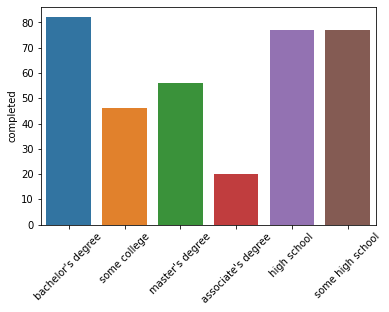

In [28]:
sb.barplot(data = data1,x = parent_edu,y = 'completed').set_xticklabels(parent_edu,rotation = 45)

Inference1 : Students whose parents got educated in bachelor's and in highschools completed more test preparation courses.

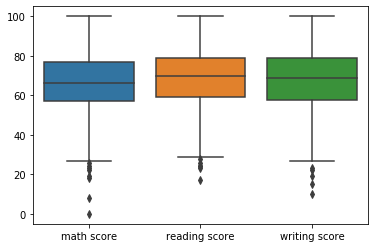

In [34]:
sb.boxplot(data = student_data)

Inference 2 : This shows the distribution of values of scores. Thier mean value is almost same, As we stated above(describe() function),math score has least values and has more outliers. Reading scores are better compared to all the tests.

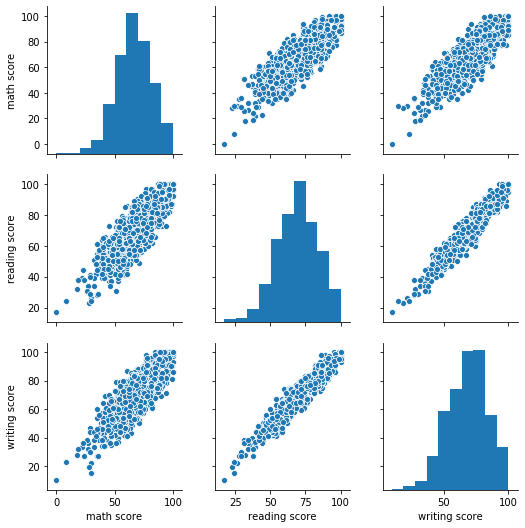

In [41]:
sb.pairplot(data = student_data) #plots against all the numerical columns.

Inference 3: We can observe that scores are normally distributed, and they maintain a linear relation(approximately) with others.

#### Relation between the numerical data (output)

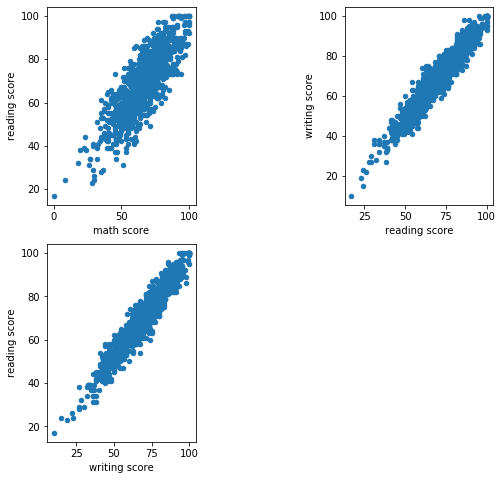

In [42]:
fig1,ax1 = plt.subplots(nrows = 2,ncols =2,figsize =(8,8))
fig1 = plt.subplots_adjust(wspace = 1)
fig1 =plt.delaxes(ax=ax1[1,1])
student_data.plot(kind = 'scatter',x = 'math score',y = 'reading score',ax = ax1[0,0])
student_data.plot(kind = 'scatter',x = 'reading score',y = 'writing score',ax = ax1[0,1])
student_data.plot(kind = 'scatter',x = 'writing score',y = 'reading score',ax = ax1[1,0])

Inference 4= The relation between the three tests(math , reading , writing) is nearly linear. That is if a student performs well in math he may have been performed well in both reading and writing tests too and viceversa.

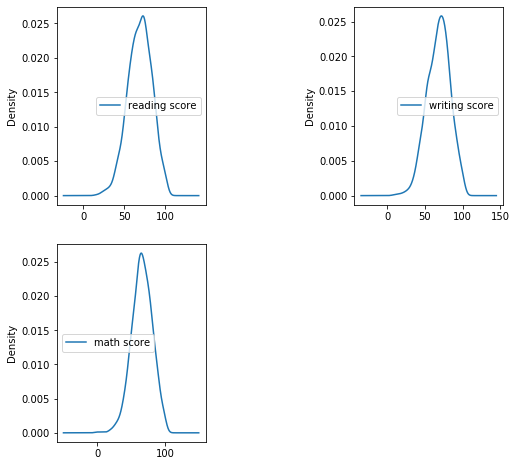

In [47]:
fig1,ax1 = plt.subplots(nrows = 2,ncols =2,figsize =(8,8))
fig1 = plt.subplots_adjust(wspace = 1)
fig1 =plt.delaxes(ax=ax1[1,1])
student_data.plot(kind = 'kde',y = 'reading score',ax = ax1[0,0])
student_data.plot(kind = 'kde',y = 'writing score',ax = ax1[0,1])
student_data.plot(kind = 'kde',y = 'math score',ax = ax1[1,0])

Inference 5: We can observe the density of scores. This is a kind of normal distribution.

#### Gender and scores

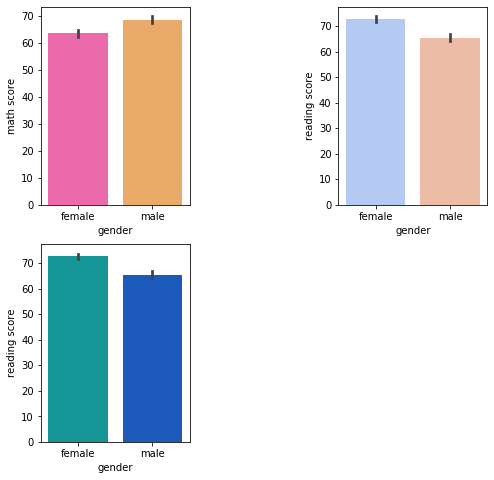

In [59]:
fig2,ax2 = plt.subplots(nrows = 2,ncols =2,figsize =(8,8))
fig2 = plt.subplots_adjust(wspace = 1)
fig2 =plt.delaxes(ax=ax2[1,1])
sb.barplot(data = student_data,x = 'gender',y = 'math score',ax = ax2[0,0],palette = 'spring')
sb.barplot(data = student_data,x = 'gender',y = 'reading score',ax =ax2[0,1],palette = 'coolwarm')
sb.barplot(data = student_data,x = 'gender',y = 'reading score',ax = ax2[1,0],palette = 'winter_r')

Inference 6: Females are scoring better than males in the reading and writing tests may be because they are more in number(strength). Males are scoring high in math test.

#### lunch and scores

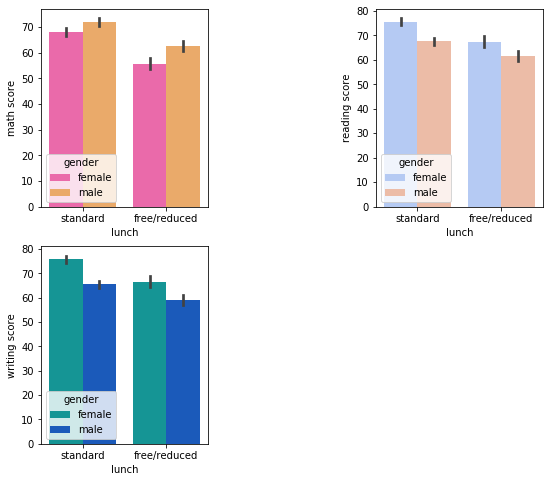

In [60]:
fig3,ax2 = plt.subplots(nrows = 2,ncols =2,figsize =(9,8))
fig3 = plt.subplots_adjust(wspace = 1)
fig3 =plt.delaxes(ax=ax2[1,1])
sb.barplot(data = student_data,x = 'lunch',y = 'math score',hue = 'gender',ax = ax2[0,0],palette = 'spring')
sb.barplot(data = student_data,x = 'lunch',y = 'reading score',hue = 'gender',ax = ax2[0,1],palette = 'coolwarm')
sb.barplot(data = student_data,x = 'lunch',y = 'writing score',hue = 'gender',ax = ax2[1,0],palette = 'winter_r')

Inference 7: Students eating standard lunch are getting high score in the reading and writing tests than those eating free/reduced lunch and in students also females are more in number.

#### Race/ethnicity and scores.

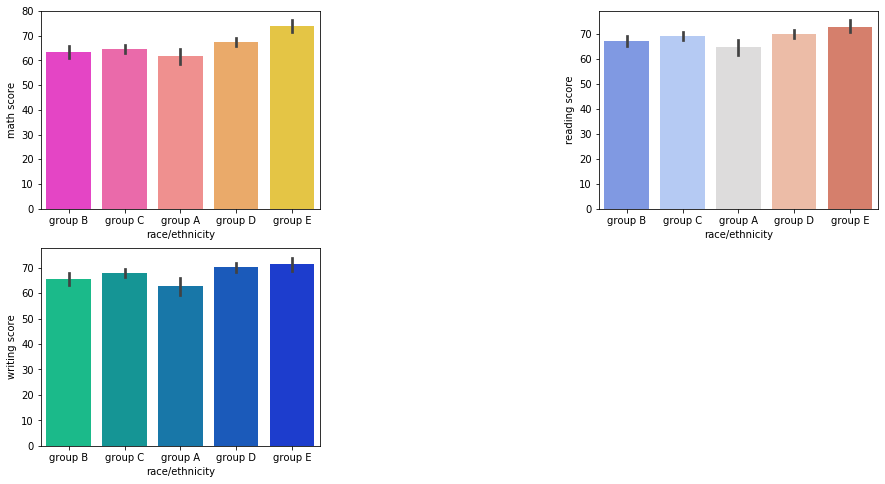

In [62]:
fig4,ax2 = plt.subplots(nrows = 2,ncols =2,figsize =(15,8))
fig4 = plt.subplots_adjust(wspace = 1)
fig4 =plt.delaxes(ax=ax2[1,1])
sb.barplot(data = student_data,x = 'race/ethnicity',y = 'math score',ax = ax2[0,0],palette = 'spring')
sb.barplot(data = student_data,x = 'race/ethnicity',y = 'reading score',ax = ax2[0,1],palette = 'coolwarm')
sb.barplot(data = student_data,x = 'race/ethnicity',y = 'writing score',ax = ax2[1,0],palette = 'winter_r')

Inference 8: There is no much difference in the performance of the students of different races but group E students are scoring slightly higher than other groups in all the tests and group A is getting slightly lesser scores in all the tests.

#### Parental level of education and scores

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

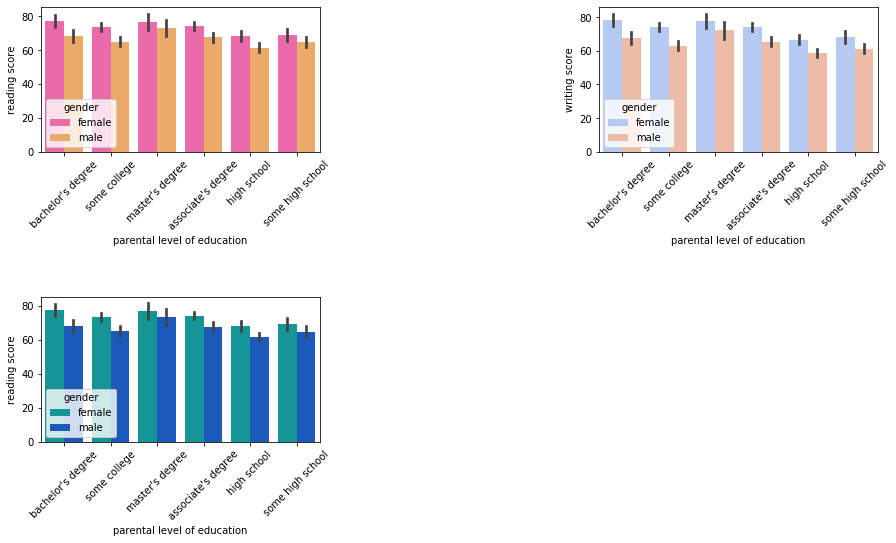

In [63]:
fig5,ax2 = plt.subplots(nrows = 2,ncols =2,figsize =(15,8))
fig5 = plt.subplots_adjust(wspace = 1,hspace = 1)
fig5 =plt.delaxes(ax=ax2[1,1])
sb.barplot(data = student_data,x = 'parental level of education',y = 'reading score',hue = 'gender',ax = ax2[0,0],palette = 'spring').set_xticklabels(parent_edu,rotation = 45)
sb.barplot(data = student_data,x = 'parental level of education',y = 'writing score',hue = 'gender',ax = ax2[0,1],palette = 'coolwarm').set_xticklabels(parent_edu,rotation = 45)
sb.barplot(data = student_data,x = 'parental level of education',y = 'reading score',hue = 'gender',ax = ax2[1,0],palette = 'winter_r').set_xticklabels(parent_edu,rotation = 45)


Inference 9: There is no much difference between the performances of students having different parent educations. Hence, this feature is not of much importance directly to get the high scores.

#### Test preparation course and scores.

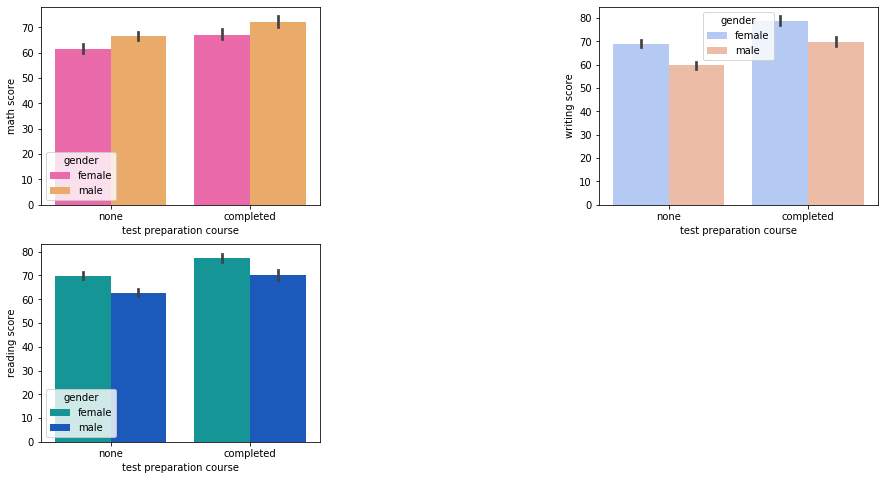

In [64]:
fig5,ax2 = plt.subplots(nrows = 2,ncols =2,figsize =(15,8))
fig5 = plt.subplots_adjust(wspace = 1)
fig5 =plt.delaxes(ax=ax2[1,1])
sb.barplot(data = student_data,x = 'test preparation course',y = 'math score',hue = 'gender',ax = ax2[0,0],palette = 'spring')
sb.barplot(data = student_data,x = 'test preparation course',y = 'writing score',hue = 'gender',ax = ax2[0,1],palette = 'coolwarm')
sb.barplot(data = student_data,x = 'test preparation course',y = 'reading score',hue = 'gender',ax = ax2[1,0],palette = 'winter_r')

Inference 10: Students who completed the test preparation courses scored high in all the tests. 

# Overall insights and Conclusion

Thus, we have analysed the categorical and numerical data and there relations with each other and thier importance in the behaviour of output data. Here, we are considering that student's performance in all the tests at once but not individually on math or reading because, we found that all these three numerical data has some linear relation ship. Hence if a student performs well in one test , he/she is more likely to perform well in other subjects too.

There are totally 1000 students (rows) and 8 features (columns). In 8 features , three are of numerical and five are of categorical.
The three numerical columns are output data. we need to find the output through their relations with other given data.
This data does not have any null values , so no need to fill any values.


In total 1000 students , 518 are females and 482 are males . As females are more in number , the mode of getting high scores is more in females. Coming to thier performance in tests, females except in math scored high in all subjects.(although less difference).

In aspects of lunch, students eating standard lunch are scoring high, it may be because good food improves brain activity and helps to focus on scoring high marks. More number of females got standard food (high in strength) and hence they can perform even better compared to males.

Students who completed test preparation course got high scores in all the tests.Here, there is relation between food and lunch also, More students who got standard food are able to complete test courses and hence standard food has indirect contributions also and Hence it is an imortant feature.


Education of parents did play role in completion of test preparation courses.Students whose parent has a bachelor's degree are more in students completing test courses. It may be because of genes or financial assistance to complete the cousrse.We are presently not saying how important or how much influence this feature has on output data mathematically. We can do it by feature scaling. 

In aspects of race/ethnicity , students are more from group C , hence students getting standard food are more in this category, and females , males are obviously more in this group. It is expected that student from this group is more likely to score high in tests than that of a student fron another group. But from inference ,group E students are scoring high in all tests. There may be several reasons but we can think that indirect relations cannot be guarantted.

From the above basic insights, we can say that student who is a female , ate standard food, completed test preparation course, belonging to group 'E', her parent holding a bachelor's degree is more likely to get high scores in all the tests. It is just a probability of high chance. We can get better insights on adding mathematical theory and by doing feature engineering as well.
Finally, on applying some related ml algorithm , we get good prediction.This problem is related to regression model.